# **Installing and Initializing Spark on Google Colab**

In [ ]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

!tar xf spark-3.5.0-bin-hadoop3.tgz

!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
import findspark
findspark.find()

'/content/spark-3.5.0-bin-hadoop3'

In [ ]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=7393edb4006a309e0a04ab0cde7e75cb1916eeb071b3c95ed383ac9d0363b104
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
findspark.init()

In [ ]:
!pip install findspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
spark

# **Reading CSV File using Spark**

In [ ]:
df = spark.read.csv("Airports2.csv", header=True, inferSchema=True)
df.registerTempTable('df')

/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


# **Basic Insights into Data**

In [ ]:
df.printSchema()

root
 |-- Origin_airport: string (nullable = true)
 |-- Destination_airport: string (nullable = true)
 |-- Origin_city: string (nullable = true)
 |-- Destination_city: string (nullable = true)
 |-- Passengers: integer (nullable = true)
 |-- Seats: integer (nullable = true)
 |-- Flights: integer (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- Fly_date: date (nullable = true)
 |-- Origin_population: integer (nullable = true)
 |-- Destination_population: integer (nullable = true)
 |-- Org_airport_lat: string (nullable = true)
 |-- Org_airport_long: string (nullable = true)
 |-- Dest_airport_lat: string (nullable = true)
 |-- Dest_airport_long: string (nullable = true)



In [ ]:
df.count()

7396

In [ ]:
df.describe().show()

+-------+--------------+-------------------+------------+----------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------+-------------------+------------------+-------------------+
|summary|Origin_airport|Destination_airport| Origin_city|Destination_city|       Passengers|             Seats|           Flights|          Distance| Origin_population|Destination_population|  Org_airport_lat|   Org_airport_long|  Dest_airport_lat|  Dest_airport_long|
+-------+--------------+-------------------+------------+----------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------+-------------------+------------------+-------------------+
|  count|          7396|               7396|        7396|            7396|             7396|              7396|              7396|              7396|              7396|                  7396|  

# **Spark Transformation and Action Operations**

In [ ]:
df.show(5)

+--------------+-------------------+-------------+----------------+----------+-----+-------+--------+----------+-----------------+----------------------+----------------+-----------------+----------------+-----------------+
|Origin_airport|Destination_airport|  Origin_city|Destination_city|Passengers|Seats|Flights|Distance|  Fly_date|Origin_population|Destination_population| Org_airport_lat| Org_airport_long|Dest_airport_lat|Dest_airport_long|
+--------------+-------------------+-------------+----------------+----------+-----+-------+--------+----------+-----------------+----------------------+----------------+-----------------+----------------+-----------------+
|           MHK|                AMW|Manhattan, KS|        Ames, IA|        21|   30|      1|     254|2008-10-01|           122049|                 86219| 39.140998840332|-96.6707992553711|              NA|               NA|
|           EUG|                RDM|   Eugene, OR|        Bend, OR|        41|  396|     22|     103|199

In [ ]:
df.select("Origin_airport","Destination_airport","Passengers","Seats").show(15)

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql.functions import desc
import pyspark.sql.utils

airportAgg_DF = df.groupBy("Origin_airport").agg(F.sum("Passengers"))
airportAgg_DF.show(10)

+--------------+---------------+
|Origin_airport|sum(Passengers)|
+--------------+---------------+
|           GEG|          13034|
|           GTF|          11749|
|           GRB|          10772|
|           FOD|           3139|
|           IDA|            388|
|           EUG|          29551|
|           GYY|           6714|
|           OAK|            442|
|           FSM|           6648|
|           BTM|           8576|
+--------------+---------------+
only showing top 10 rows



# **Spark SQL**

## **Highest Flight Departures Airport**

In [ ]:
originAirports = sqlContext.sql("""select Origin_Airport, sum(Flights) as Flights2
                                    from df group by Origin_Airport order by sum(Flights) DESC limit 10""")
originAirports.show()

+--------------+--------+
|Origin_Airport|Flights2|
+--------------+--------+
|           PDX|   70645|
|           SEA|   19152|
|           SFO|    9947|
|           SLC|    4019|
|           LMT|    2415|
|           LAX|    1917|
|           EUG|    1187|
|           OMA|     402|
|           LAS|     310|
|           ABQ|     207|
+--------------+--------+



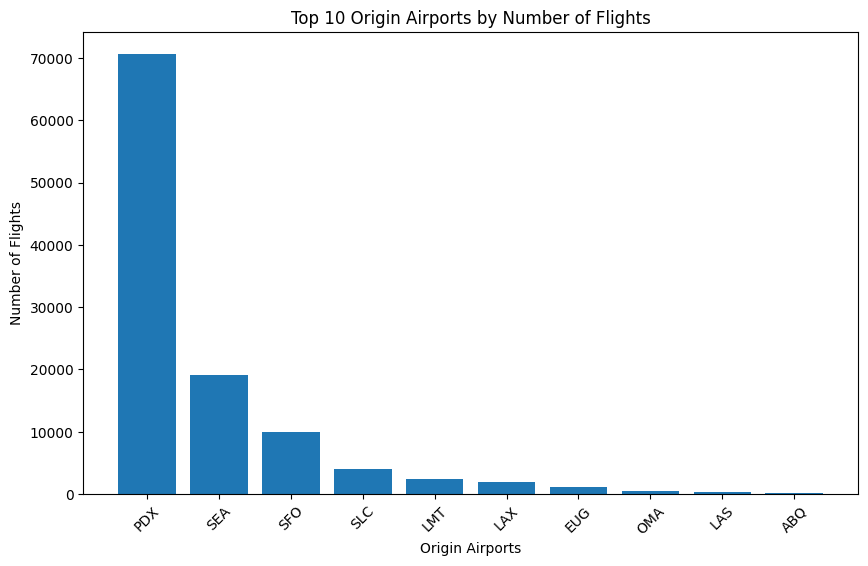

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'originAirports' is a DataFrame
result_df = originAirports.toPandas()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_df['Origin_Airport'], result_df['Flights2'])
plt.xlabel('Origin Airports')
plt.ylabel('Number of Flights')
plt.title('Top 10 Origin Airports by Number of Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


## **Highest Passenger Arrival Airport**

In [ ]:
destinationAirports = sqlContext.sql("""select Destination_airport, sum(Passengers) as Passengers2
                                    from df group by Destination_airport order by sum(Passengers) DESC limit 10""")
destinationAirports.show()

+-------------------+-----------+
|Destination_airport|Passengers2|
+-------------------+-----------+
|                RDM|    2346077|
|                EKO|     841334|
|                AMW|         21|
+-------------------+-----------+



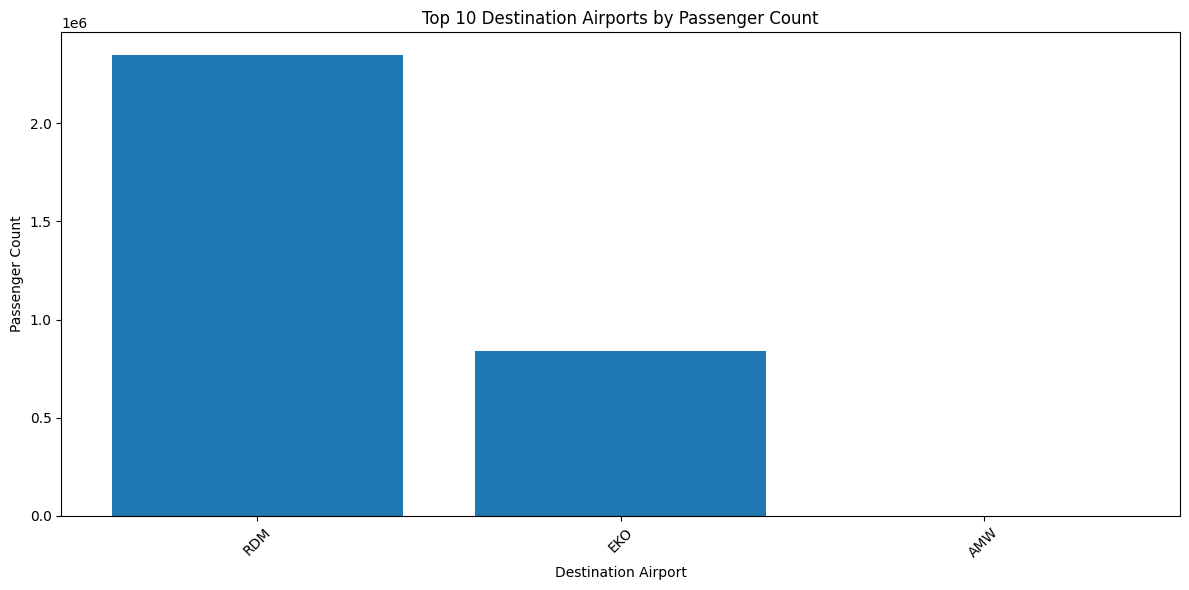

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that `destinationAirports` is a DataFrame from your query
# If it's not, you may need to convert the SQL result to a DataFrame first.

# Convert the DataFrame to a Pandas DataFrame
destinationAirports_pd = destinationAirports.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(destinationAirports_pd['Destination_airport'], destinationAirports_pd['Passengers2'])
plt.xlabel('Destination Airport')
plt.ylabel('Passenger Count')
plt.title('Top 10 Destination Airports by Passenger Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


## **Airports with Most Flights**

In [ ]:
MostFlightsByAirports = sqlContext.sql("""with destination as (select Destination_airport as Airport, sum(Flights) as Out_Flights
                                    from df group by Destination_airport),
                                    origin as (select Origin_airport as Airport, sum(Flights) as In_Flights
                                    from df group by Origin_airport)
                                    select origin.Airport, (destination.Out_Flights+origin.In_Flights) as Total_Flights
                                    from origin, destination
                                    where origin.Airport = destination.Airport
                                    order by (origin.In_Flights + destination.Out_Flights) DESC
                                    limit 15""")
MostFlightsByAirports.show()

+-------+-------------+
|Airport|Total_Flights|
+-------+-------------+
|    RDM|       108617|
|    EKO|         8185|
+-------+-------------+



## **Airports with Most Passengers**

In [ ]:
MostPassengersByAirports = sqlContext.sql("""with destination as (select Destination_airport as Airport, sum(Passengers*Flights) as Out_Passengers
                                    from df group by Destination_airport),
                                    origin as (select Origin_airport as Airport, sum(Passengers) as In_Passengers
                                    from df group by Origin_airport)
                                    select origin.Airport, (destination.Out_Passengers+origin.In_Passengers) as Total_Passengers
                                    from origin, destination
                                    where origin.Airport = destination.Airport
                                    order by (origin.In_Passengers + destination.Out_Passengers) DESC
                                    limit 15""")
MostPassengersByAirports.show()

+-------+----------------+
|Airport|Total_Passengers|
+-------+----------------+
|    RDM|       291412294|
|    EKO|         1996391|
+-------+----------------+



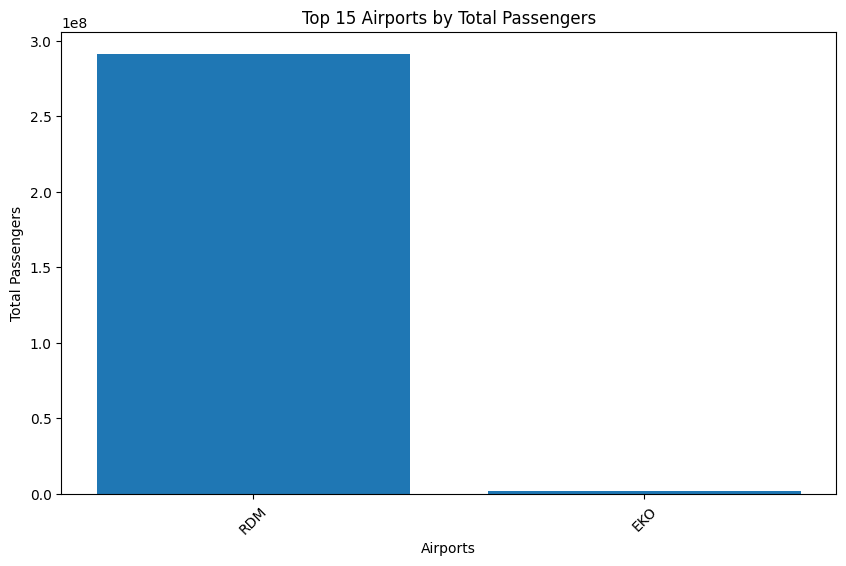

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'MostPassengersByAirports' is a DataFrame
result_df = MostPassengersByAirports.toPandas()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_df['Airport'], result_df['Total_Passengers'])
plt.xlabel('Airports')
plt.ylabel('Total Passengers')
plt.title('Top 15 Airports by Total Passengers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


## **Occupancy Rates for Routes with Most Flights**

In [ ]:
distanceQuery = sqlContext.sql("""with table1 as
                                    (select least(Origin_airport, Destination_airport) as Airport1,
                                    greatest(Destination_airport, Origin_airport) as Airport2,
                                    sum(Flights) as Flights,
                                    sum(Passengers) as Passengers,
                                    sum(Seats) as Seats
                                    from df
                                    group by least(Origin_airport, Destination_airport), greatest(Destination_airport, Origin_airport)
                                    order by 1,2)
                                    select t.*, (Passengers*100/Seats) as Occupancy_Rate
                                    from table1 t
                                    order by Flights DESC, Seats DESC, Passengers DESC, Occupancy_Rate DESC
                                    limit 15;""")
distanceQuery = distanceQuery.filter((col("Occupancy_Rate").isNotNull()) & (col("Occupancy_Rate")<=100.0))
distanceQuery.show(15)

+--------+--------+-------+----------+-------+------------------+
|Airport1|Airport2|Flights|Passengers|  Seats|    Occupancy_Rate|
+--------+--------+-------+----------+-------+------------------+
|     PDX|     RDM|  70150|   1268215|2081640| 60.92383889625488|
|     RDM|     SEA|  18540|    529537| 783611| 67.57651436746039|
|     RDM|     SFO|   9947|    202194| 306874| 65.88827988034177|
|     RDM|     SLC|   3752|    145204| 187756|  77.3365431730544|
|     LMT|     RDM|   2415|     13333|  54161| 24.61734458374107|
|     LAX|     RDM|   1917|     96203| 147694| 65.13670155862798|
|     EUG|     RDM|   1139|     24846|  66938|37.117930024799065|
|     EKO|     SEA|    612|     62638|  76010|  82.4075779502697|
|     EKO|     PDX|    495|     44779|  57551|  77.8075098608191|
|     EKO|     OMA|    402|     44233|  49755| 88.90161792784644|
|     LAS|     RDM|    308|     36379|  46200| 78.74242424242425|
|     EKO|     SLC|    267|     28664|  33048| 86.73444686516582|
|     ABQ|

## **Number of Flights vs Distance - Part 1**

In [ ]:
distanceQuery = sqlContext.sql("""with table1 as
                                    (select least(Origin_airport, Destination_airport) as Airport1,
                                    greatest(Destination_airport, Origin_airport) as Airport2,
                                    mean(Distance) as Distance,
                                    sum(Flights) as Flights
                                    from df
                                    group by least(Origin_airport, Destination_airport), greatest(Destination_airport, Origin_airport)
                                    order by 1,2)
                                    select t.*
                                    from table1 t
                                    where Flights>0
                                    order by Distance DESC
                                    limit 15;""")
# distanceQuery = distanceQuery.filter((col("Occupancy_Rate").isNotNull()) & (col("Occupancy_Rate")<=100.0))
distanceQuery.show(15)

+--------+--------+--------+-------+
|Airport1|Airport2|Distance|Flights|
+--------+--------+--------+-------+
|     FLL|     RDM|  2601.0|      1|
|     CAK|     EKO|  1788.0|     16|
|     CLE|     EKO|  1760.0|     17|
|     FBK|     RDM|  1750.0|      1|
|     CMH|     EKO|  1727.0|      3|
|     DTW|     EKO|  1675.0|      5|
|     DAY|     EKO|  1658.0|     17|
|     ANC|     RDM|  1658.0|      2|
|     CVG|     EKO|  1649.0|      4|
|     GGG|     RDM|  1643.0|      6|
|     BNA|     EKO|  1603.0|     16|
|     EKO|     FWA|  1594.0|      1|
|     AZO|     EKO|  1563.0|      2|
|     EKO|     IND|  1554.0|     36|
|     BTR|     EKO|  1550.0|      2|
+--------+--------+--------+-------+



## **Number of Flights vs Distance - Part 2**

In [ ]:
distanceQuery = sqlContext.sql("""with table1 as
                                    (select least(Origin_airport, Destination_airport) as Airport1,
                                    greatest(Destination_airport, Origin_airport) as Airport2,
                                    mean(Distance) as Distance,
                                    sum(Flights) as Flights
                                    from df
                                    group by least(Origin_airport, Destination_airport), greatest(Destination_airport, Origin_airport)
                                    order by 1,2)
                                    select t.*
                                    from table1 t
                                    where Flights>0
                                    order by Flights DESC
                                    limit 15;""")
# distanceQuery = distanceQuery.filter((col("Occupancy_Rate").isNotNull()) & (col("Occupancy_Rate")<=100.0))
distanceQuery.show(15)

+--------+--------+--------+-------+
|Airport1|Airport2|Distance|Flights|
+--------+--------+--------+-------+
|     PDX|     RDM|   116.0|  70150|
|     RDM|     SEA| 227.996|  18540|
|     RDM|     SFO|   462.0|   9947|
|     RDM|     SLC|   526.0|   3752|
|     LMT|     RDM|   147.0|   2415|
|     LAX|     RDM|   726.0|   1917|
|     EUG|     RDM|   103.0|   1139|
|     EKO|     SEA|   560.0|    612|
|     EKO|     PDX|   475.0|    495|
|     EKO|     OMA|  1037.0|    402|
|     LAS|     RDM|   647.0|    308|
|     EKO|     SLC|   200.0|    267|
|     ABQ|     EKO|   640.0|    204|
|     DFW|     EKO|  1170.0|    170|
|     EKO|     OKC|  1057.0|    162|
+--------+--------+--------+-------+



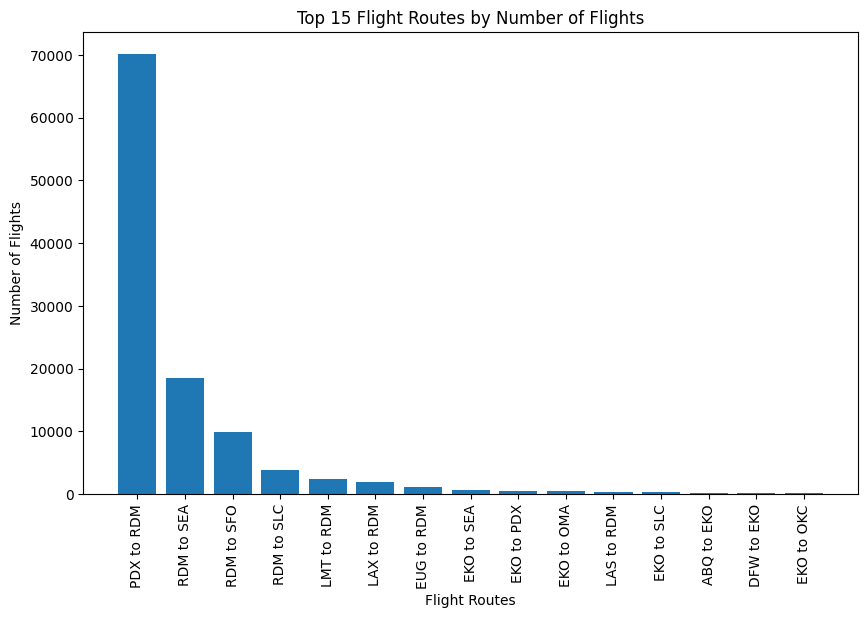

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'distanceQuery' is a DataFrame
result_df = distanceQuery.toPandas()

# Sort the DataFrame by 'Flights' in descending order
result_df = result_df.sort_values(by='Flights', ascending=False)

# Select the top 15 rows
result_df = result_df.head(15)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_df['Airport1'] + ' to ' + result_df['Airport2'], result_df['Flights'])
plt.xlabel('Flight Routes')
plt.ylabel('Number of Flights')
plt.title('Top 15 Flight Routes by Number of Flights')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()
